In [1]:
from pandas import Series
import pandas as pd
import numpy as np
import dtale  # Удобная библиотека для просмотра и анализа
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [2]:
data = pd.read_csv('train.csv')
data.sample(10)

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
67361,66254,SCH,F,37,N,N,0,0,6,1,2,35000,N,0
34613,76703,SCH,M,33,Y,Y,0,0,1,1,2,50000,N,0
61627,25118,SCH,F,49,N,N,0,0,0,1,2,30000,N,0
25314,95233,GRD,F,49,Y,Y,0,0,0,2,3,110000,Y,0
8201,38532,SCH,M,32,Y,N,0,0,2,1,2,30000,N,0
488,25616,GRD,M,57,Y,Y,0,0,4,1,3,13000,Y,0
2224,76552,GRD,F,30,N,N,0,0,0,2,3,26000,N,0
3856,86521,UGR,F,62,Y,N,1,0,3,2,3,14000,N,0
45044,8128,SCH,M,41,Y,Y,0,0,0,1,2,50000,N,0
2171,68062,UGR,M,38,N,N,0,0,4,1,2,30000,N,1


In [3]:
#d = dtale.show(data)
#d

In [4]:
data.describe()

,client_id,age,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,default
count,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000
mean,55137.965094,39.280641,0.275749,0.164894,2.000339,1.575509,2.496280,41099.775417,0.126994
std,31841.921168,11.520378,0.804272,0.371087,2.252073,0.527631,0.689818,46166.322400,0.332968
min,1.000000,21.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1000.000000,0.000000
25%,27440.500000,30.000000,0.000000,0.000000,0.000000,1.000000,2.000000,20000.000000,0.000000
50%,55274.000000,37.000000,0.000000,0.000000,1.000000,2.000000,3.000000,30000.000000,0.000000
75%,82758.500000,48.000000,0.000000,0.000000,3.000000,2.000000,3.000000,48000.000000,0.000000
max,110147.000000,72.000000,33.000000,1.000000,53.000000,3.000000,3.000000,1000000.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [6]:
# Подсчёт пропусков в столбцах
data.isnull().sum()

client_id             0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
bki_request_cnt       0
home_address          0
work_address          0
income                0
foreign_passport      0
default               0
dtype: int64

In [7]:
data.sex.value_counts()

F    41562
M    32237
Name: sex, dtype: int64

In [8]:
data.car.value_counts()

N    49832
Y    23967
Name: car, dtype: int64

In [9]:
# Заполнили пропуски в образовании
data.education.fillna('no_info', inplace=True)
data.education.value_counts()

SCH        38860
GRD        23365
UGR         9816
PGR         1257
no_info      307
ACD          194
Name: education, dtype: int64

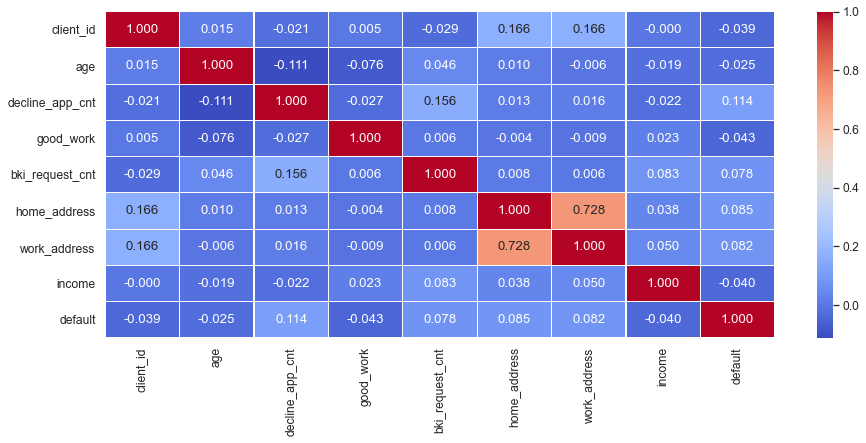

In [10]:
sns.set(font_scale=1.1)
plt.subplots(figsize=(15,6))
sns.heatmap(data.corr(), annot=True, fmt='.3f', linewidths=0.1, cmap="coolwarm")

In [11]:
# Сконвертировать целевые столбцы в бинарные значения (пол, наличие авто)
data['sex'] = (data['sex'] == 'M').astype('int32')
data['car'] = (data['car'] == 'Y').astype('int32')
data['car_type'] = (data['car_type'] == 'Y').astype('int32')
data['foreign_passport'] = (data['foreign_passport'] == 'Y').astype('int32')

In [12]:
data.sex.value_counts()

0    41562
1    32237
Name: sex, dtype: int64

In [13]:
data.car.value_counts()

0    49832
1    23967
Name: car, dtype: int64

In [14]:
data.sample(10)

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
31194,94863,GRD,0,30,1,1,0,0,1,1,2,35000,0,0
5588,66296,SCH,0,60,0,0,3,0,2,1,2,7000,0,0
17399,104242,SCH,0,45,0,0,0,1,0,2,3,20000,1,0
8523,100167,SCH,1,63,0,0,0,0,1,2,3,23000,0,0
72491,2444,SCH,0,48,0,0,1,0,3,1,2,20000,0,1
45750,56939,GRD,1,35,1,1,0,0,7,2,3,120000,1,0
31130,13658,SCH,0,43,0,0,0,0,0,1,1,15000,0,0
25440,98338,SCH,1,60,1,1,0,0,1,1,1,40000,0,0
69624,108998,SCH,1,43,0,0,0,0,0,2,3,40000,0,0
71273,29735,SCH,1,35,1,1,0,0,2,1,1,50000,0,0


In [15]:
data.car_type.value_counts()

0    59791
1    14008
Name: car_type, dtype: int64

In [16]:
data.foreign_passport.value_counts()

0    62733
1    11066
Name: foreign_passport, dtype: int64

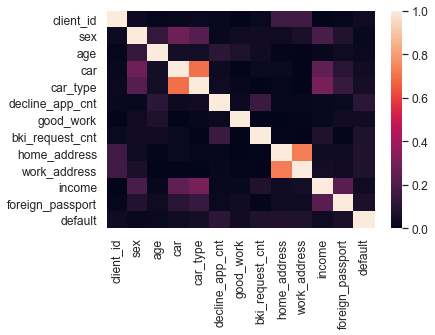

In [17]:
sns.heatmap(data.corr().abs(), vmin=0, vmax=1)